In [1]:
import biom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax
from skbio.stats.composition import closure
from gemelli.joint_ctf import joint_ctf
from gemelli.tempted import tempted_factorize
from gemelli.preprocessing import clr_transformation
from helper_functions import create_sim_data, plot_loadings, plot_mean_signal

fig_path = '/Users/bec5786/Desktop/temp_figs/'
%matplotlib inline
data_path = '../ipynb/tutorials/'

### Functions

In [2]:
group_colors = {'group1': 'tab:red', 
                'group2': 'tab:blue',
                'group3': 'tab:green'}

def sine_func(x,tps=10):
    amp = 1
    phase = 0
    t = np.linspace(0, 1, tps)
    signal = amp*(1+np.sin(2*np.pi*(t + phase)))
    return np.multiply(x, signal)

### Test 0

Run Joint-CTF on "real data" + two modalities with constant noise

In [3]:
true_mod1, _, noise_mod1, mf_mod1 = create_sim_data('mod1', n_timepoints=4, n_subjects=12, 
                                                    rank=2, C_=2e3, plotting=False)
_, _, noise_mod2, mf_mod2 = create_sim_data('mod2', n_timepoints=4, n_subjects=12, 
                                            rank=2, C_=1e3, plotting=False)

In [4]:
#ensure features add up to 1 in each sample
mod1_array = true_mod1.to_dataframe().T.values
true_mod1_closed = closure(softmax(mod1_array))
true_mod1_closed = biom.Table(true_mod1_closed.T, true_mod1.to_dataframe().index, 
                              true_mod1.to_dataframe().columns)
#apply clr transformation
true_mod1_clr = clr_transformation(true_mod1_closed, pseudocount=0.01)
true_mod1_clr = true_mod1_clr.to_dataframe().values + 2
true_mod1_clr = biom.Table(true_mod1_clr, true_mod1.to_dataframe().index, 
                           true_mod1.to_dataframe().columns)

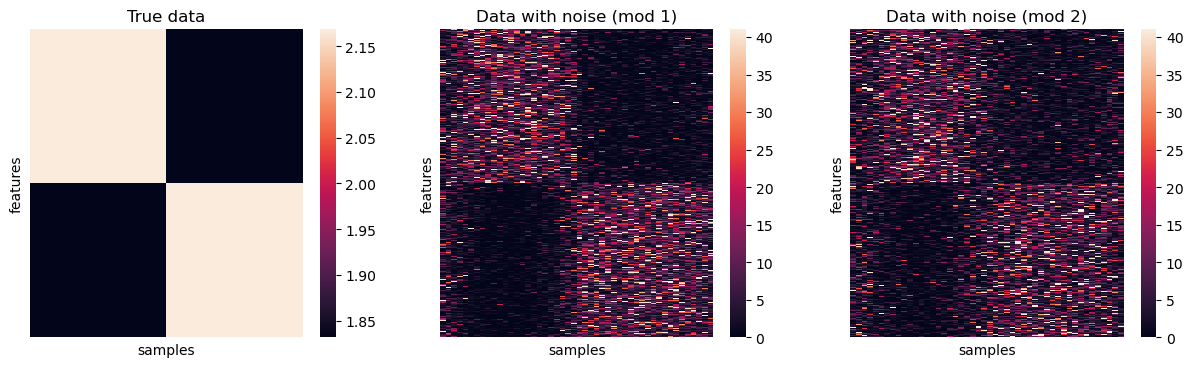

In [5]:
# plot data
fig, axn = plt.subplots(1, 3, figsize=(15, 4))
sns.heatmap(true_mod1_clr.matrix_data.toarray(), robust=False, 
            ax=axn[0], xticklabels=False, yticklabels=False)
sns.heatmap(noise_mod1.matrix_data.toarray(), robust=True, 
            ax=axn[1], xticklabels=False, yticklabels=False)
sns.heatmap(noise_mod2.matrix_data.toarray(), robust=True, 
            ax=axn[2], xticklabels=False, yticklabels=False)
plt.setp(axn, xlabel="samples", ylabel="features")
axn[0].set_title('True data', color='black', fontsize=12)
axn[1].set_title('Data with noise (mod 1)', color='black', fontsize=12)
axn[2].set_title('Data with noise (mod 2)', color='black', fontsize=12)
#plt.savefig('{}{}_sim_data_heatmap.png'.format(fig_path, C_mod2),
#            bbox_inches='tight')
plt.show()

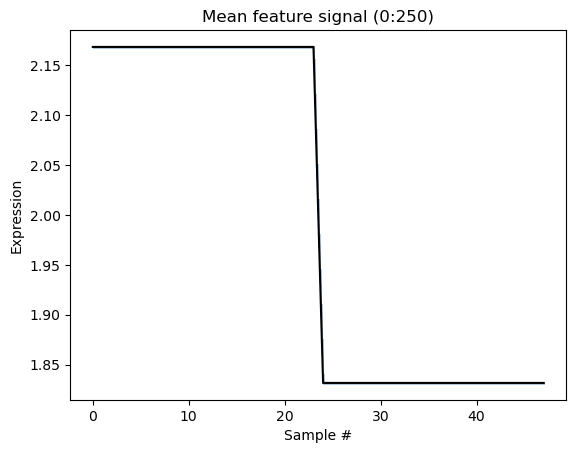

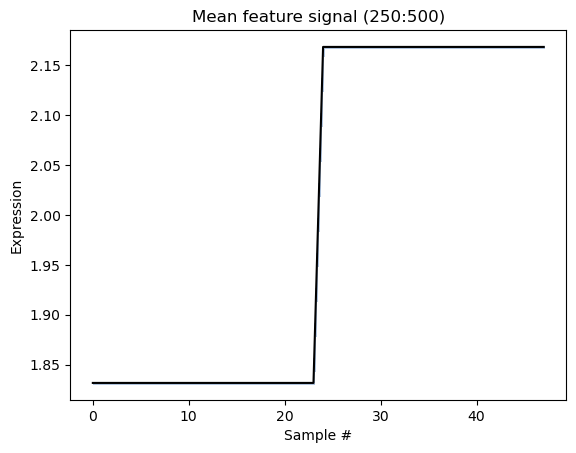

In [6]:
plot_mean_signal(true_mod1_clr, features=[0, 250], samples=None)
plot_mean_signal(true_mod1_clr, features=[250, 500], samples=None)

Fold #0:
Calculate components for component_1
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Reached convergence in 2 iterations

Calculate components for component_2
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 2
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 3
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat si

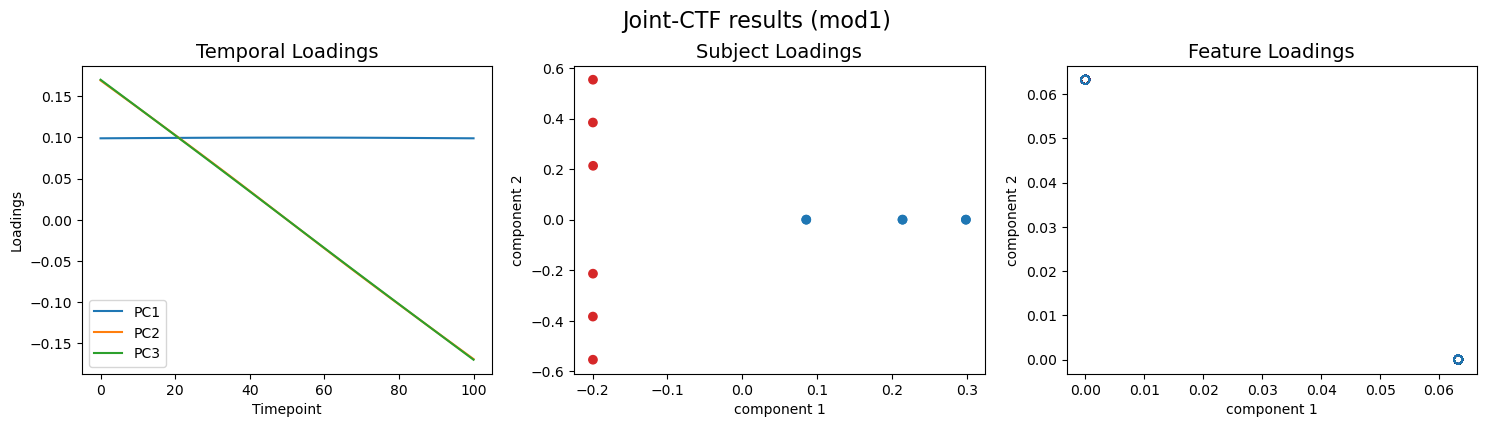

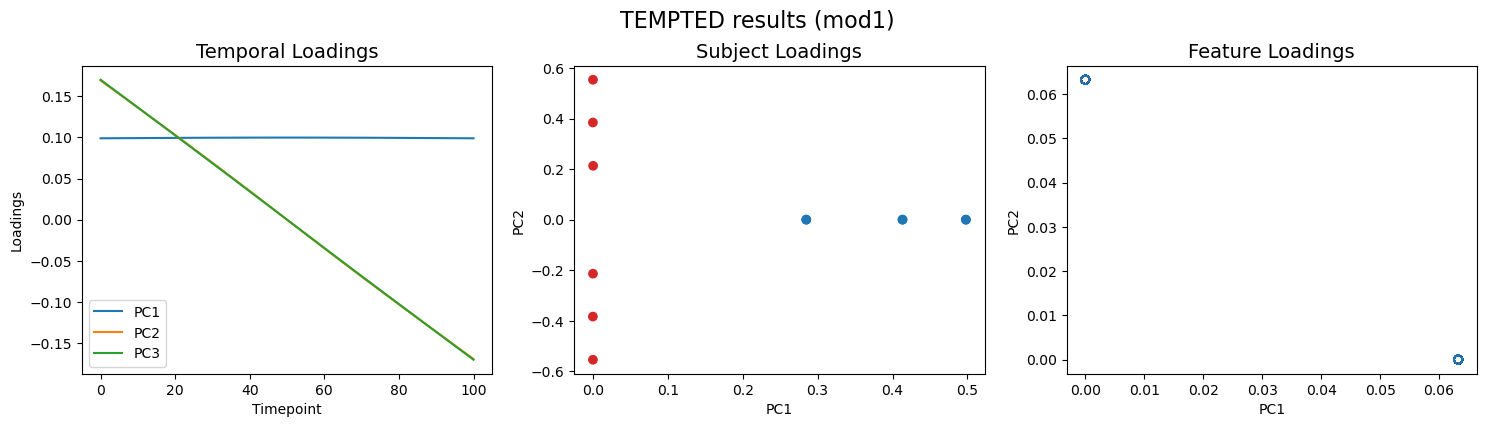

Fold #1:
Calculate components for component_1
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Reached convergence in 2 iterations

Calculate components for component_2
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 2
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 3
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat si

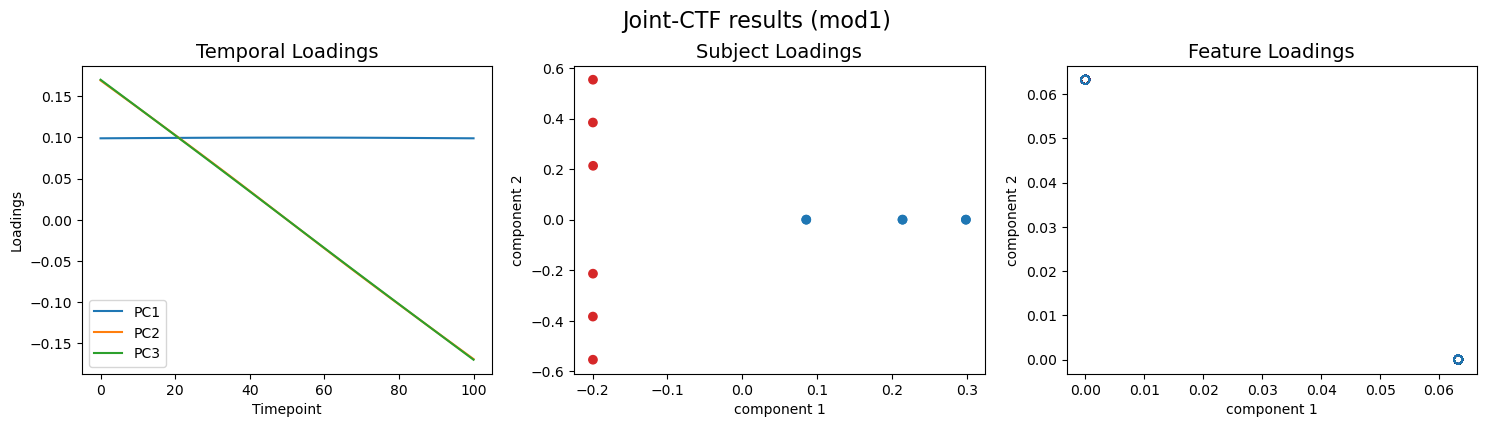

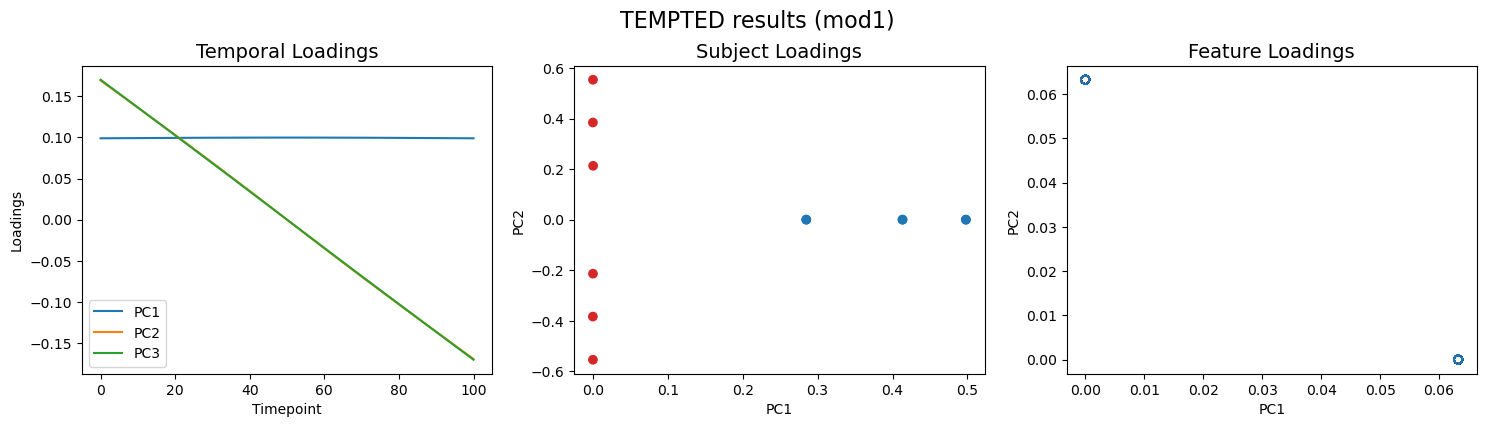

Fold #2:
Calculate components for component_1
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Reached convergence in 2 iterations

Calculate components for component_2
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 2
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 3
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat si

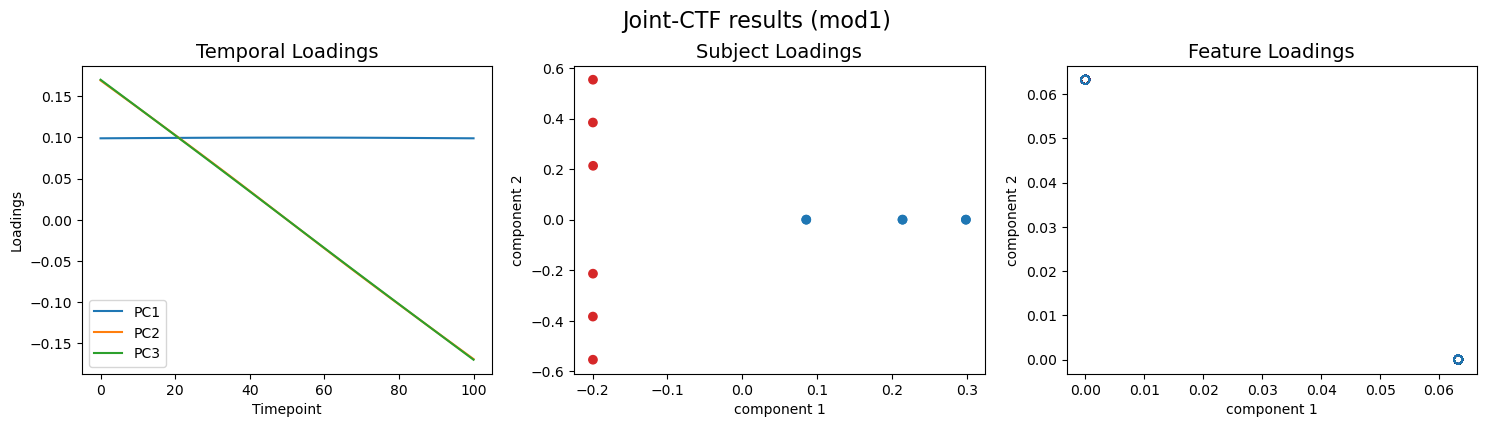

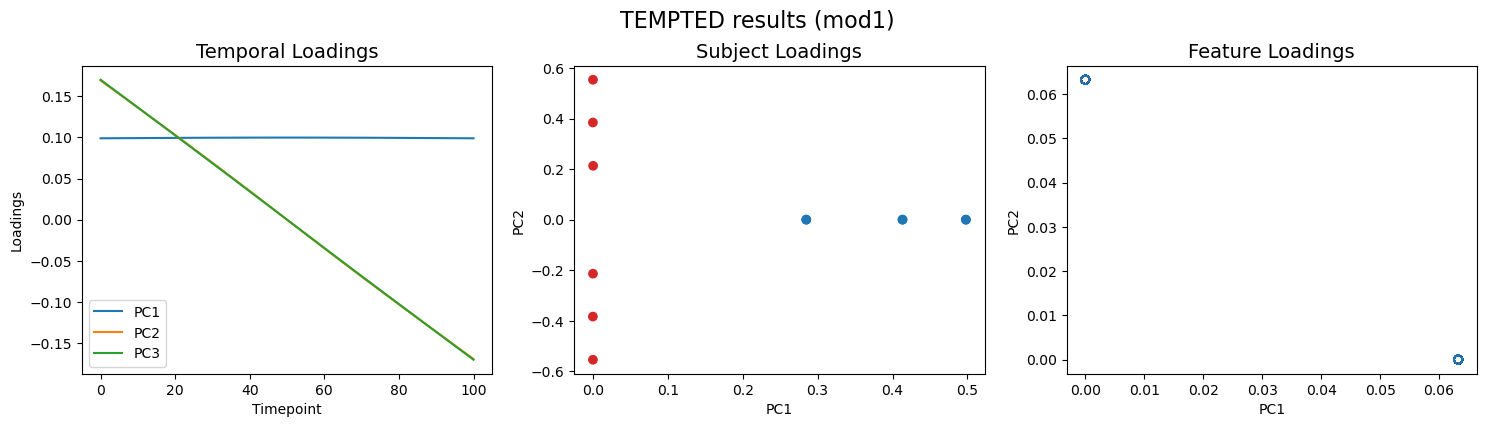

Fold #3:
Calculate components for component_1
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Reached convergence in 2 iterations

Calculate components for component_2
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 2
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 3
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat si

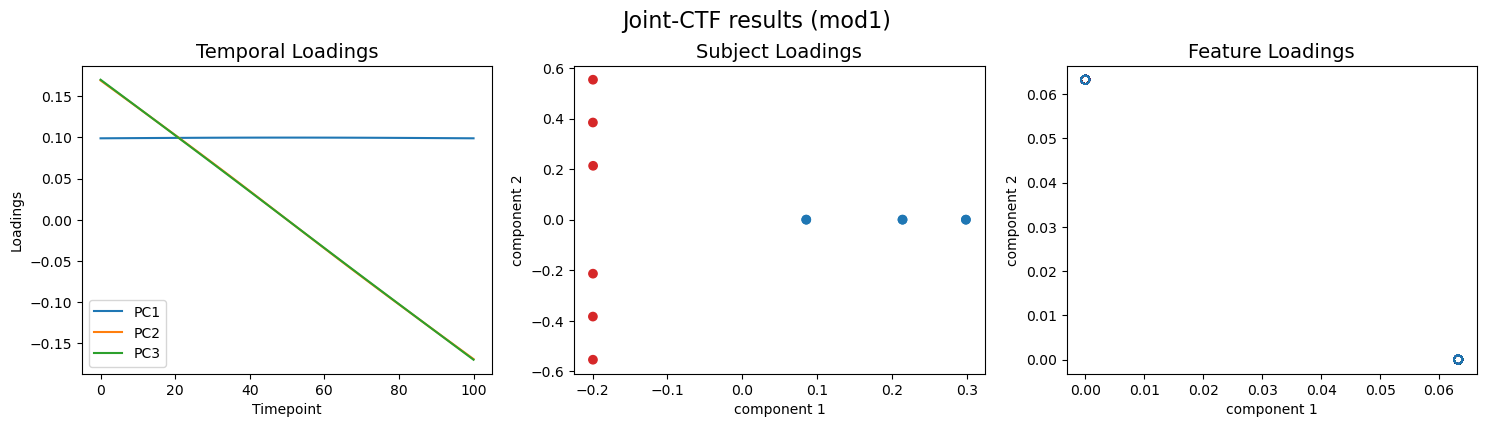

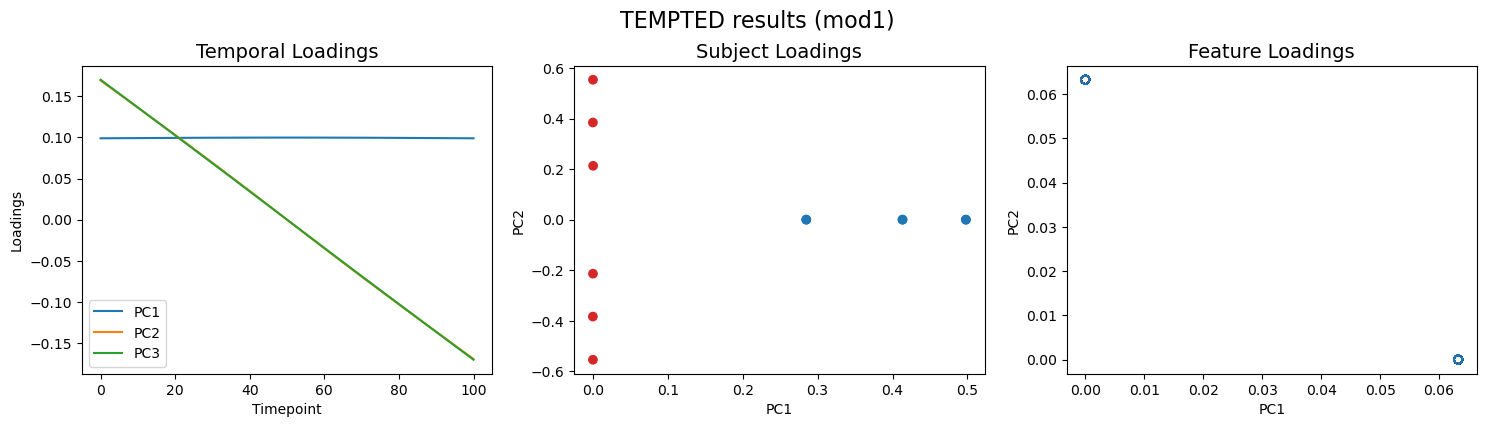

Fold #4:
Calculate components for component_1
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Reached convergence in 2 iterations

Calculate components for component_2
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 2
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 3
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat si

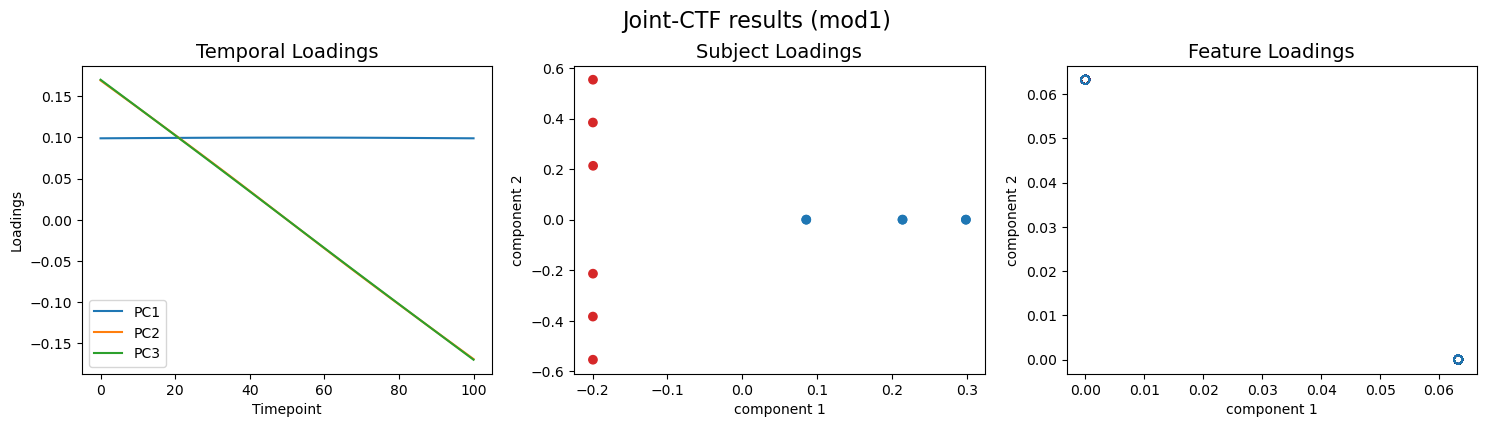

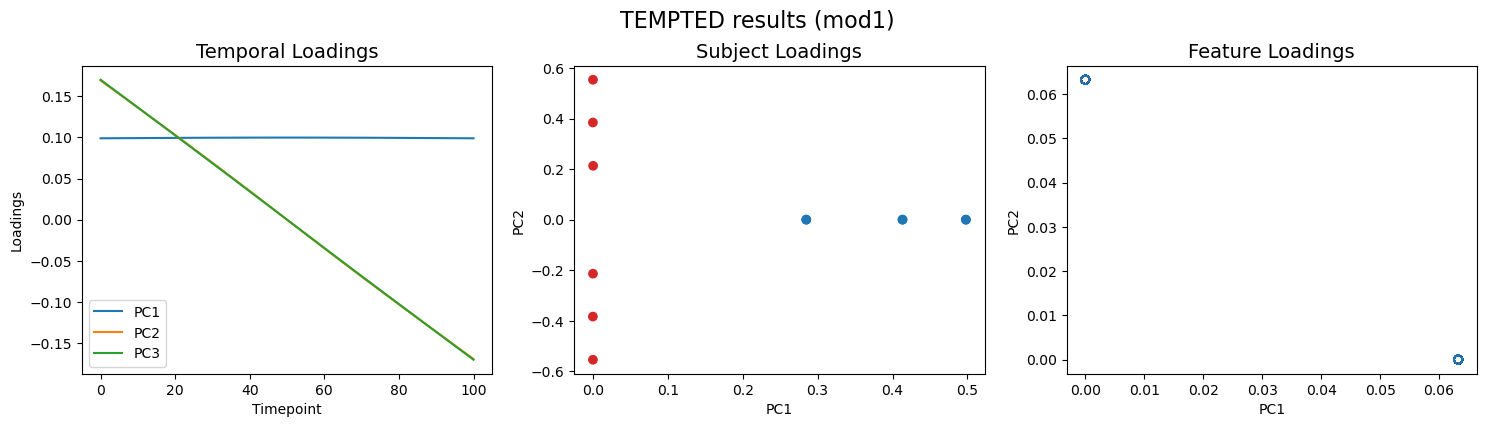

In [7]:
for i in range(0,5):
    print("Fold #{}:".format(i))
    #run joint-ctf
    (mod1_subject_loads, mod1_feature_loads, 
    mod1_state_loads, mod1_subject_lambdas,
    mod1_var_explained, mod1_feature_covs) = joint_ctf(tables=[true_mod1],
                                                    sample_metadatas=[mf_mod1],
                                                    modality_ids=['mod1'],
                                                    individual_id_column='ind_id',
                                                    state_column='timepoint')
    
    #print(mod1_subject_lambdas)
    #print(mod1_var_explained.T)

    plot_loadings(loadings=[mod1_state_loads, mod1_feature_loads, {'mod1':mod1_subject_loads}],
                  mf=mf_mod1, group_colors=group_colors, title='Joint-CTF results',
                  comp1='component_1', comp2='component_2', mod_name='mod1',
                  ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])
    

    tempted_res_noisy1 = tempted_factorize(true_mod1, mf_mod1,
                                          'ind_id', 'timepoint')
    #print(tempted_res_noisy1[0].proportion_explained)

    plot_loadings(loadings=[{'mod1':tempted_res_noisy1[1]}, 
                        {'mod1':tempted_res_noisy1[0].features}, 
                        {'mod1':tempted_res_noisy1[0].samples}],
              mf=mf_mod1, group_colors=group_colors, title='TEMPTED results',
              comp1='PC1', comp2='PC2', mod_name='mod1',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

### Noisy data

In [8]:
#run joint-ctf
(subject_loads, feature_loads, state_loads,
evals, var_explained, feature_covs) = joint_ctf(tables=[noise_mod1, noise_mod2],
                                                sample_metadatas=[mf_mod1, mf_mod2],
                                                modality_ids=['mod1', 'mod2'],
                                                individual_id_column='ind_id',
                                                state_column='timepoint')

#run joint-ctf
(true_subject_loads, true_feature_loads, 
true_state_loads, true_evals,
true_var_explained, true_feature_covs) = joint_ctf(tables=[true_mod1_clr],
                                                   sample_metadatas=[mf_mod1],
                                                   modality_ids=['mod0'],
                                                   individual_id_column='ind_id',
                                                   state_column='timepoint')

Calculate components for component_1
Iteration 0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 1
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 2
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 3
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0, lambda sign: 1.0
Iteration 4
a_hat sign: 1.0, b_hat sign: 1.0, phi_hat sign: 1.0
lambda sign: 1.0
a_

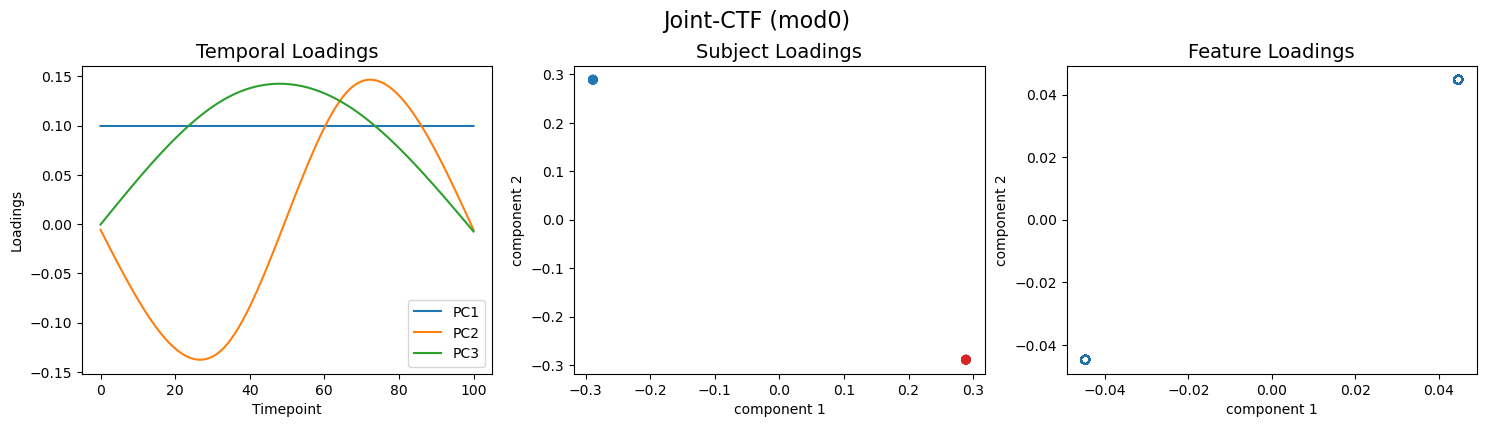

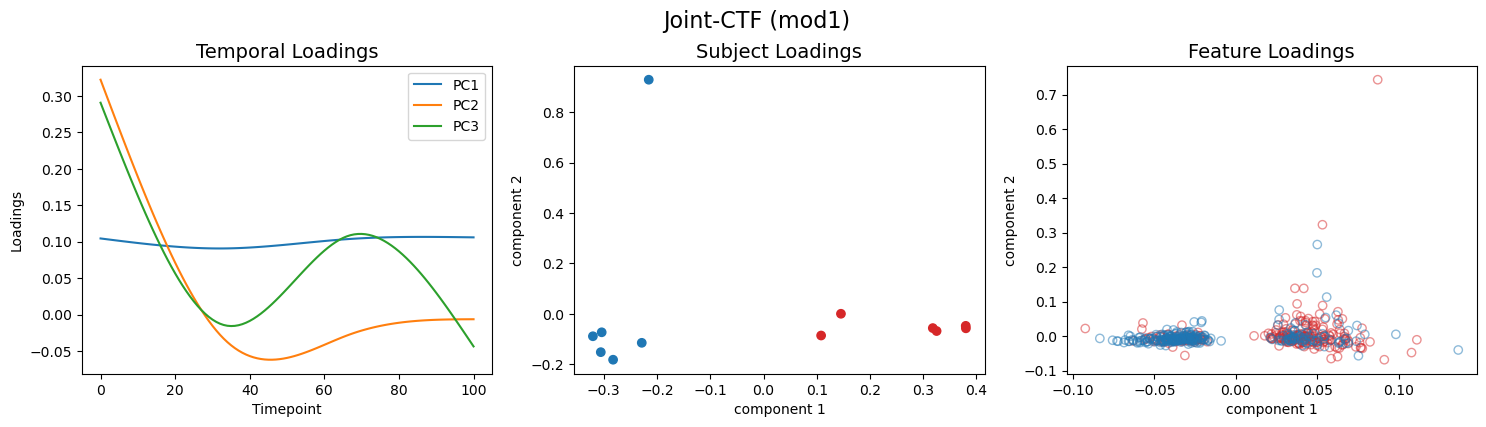

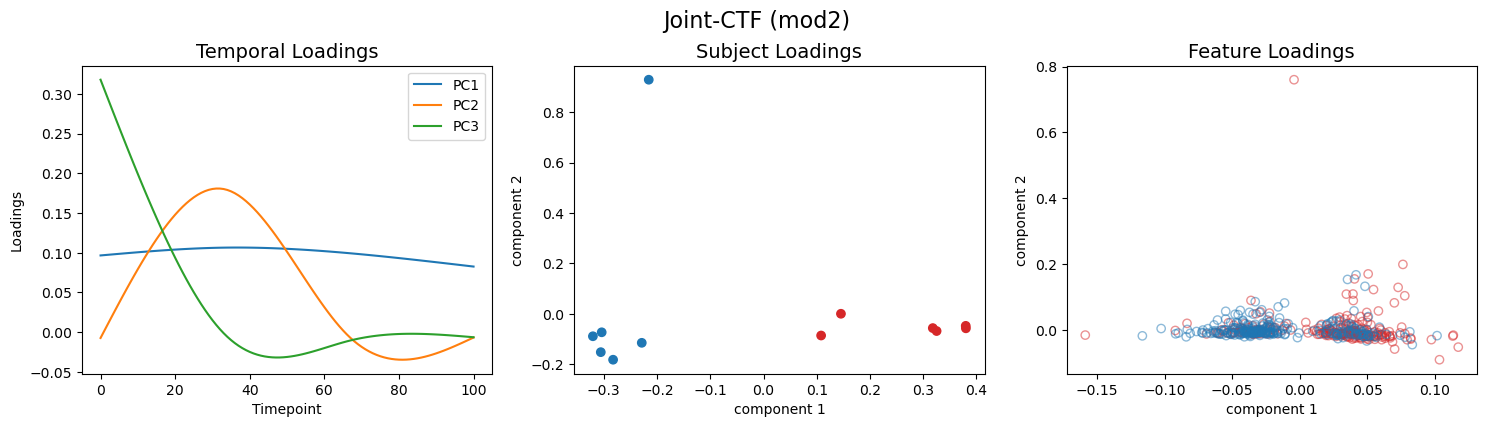

In [9]:
plot_loadings(loadings=[true_state_loads, true_feature_loads, {'mod0': true_subject_loads}],
              mf=mf_mod1, group_colors=group_colors, title="Joint-CTF",
              comp1='component_1', comp2='component_2', mod_name='mod0',
              ft_groups=[(0,250), (250,500)], ft_names=['group1','group2','group3'])

plot_loadings(loadings=[state_loads, feature_loads, {'mod1': subject_loads}],
              mf=mf_mod1, group_colors=group_colors, title="Joint-CTF",
              comp1='component_1', comp2='component_2', mod_name='mod1',
              ft_groups=[(0,250), (250,500)], ft_names=['group1','group2','group3'])

plot_loadings(loadings=[state_loads, feature_loads, {'mod2': subject_loads}],
              mf=mf_mod2, group_colors=group_colors, title="Joint-CTF",
              comp1='component_1', comp2='component_2', mod_name='mod2',
              ft_groups=[(0,250), (250,500)], ft_names=['group1','group2','group3'])

#ft_groups=[(0,167),(167,332),(332,500)] #3 group case

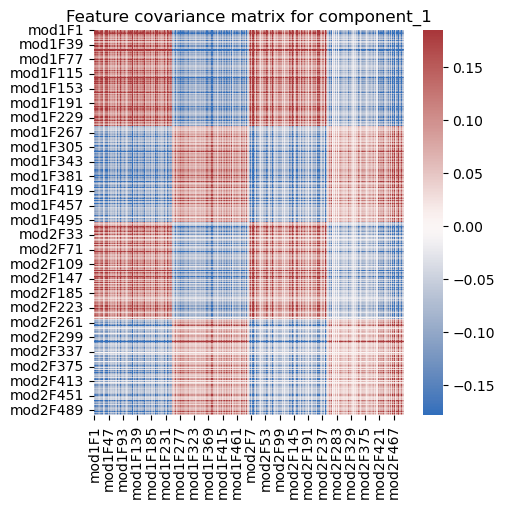

In [10]:
#get feature cov matrix and reorder IDs
feature_order1 = noise_mod1.ids(axis='observation').tolist()
feature_order2 = noise_mod2.ids(axis='observation').tolist()
feature_order = feature_order1 + feature_order2

component = 'component_1'
cov_table = feature_covs[component]
cov_table = cov_table.loc[feature_order, feature_order]

#plot heatmap of feature covariance matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cov_table, robust=True, cmap='vlag', center=0)
plt.title('Feature covariance matrix for {}'.format(component))
plt.show()

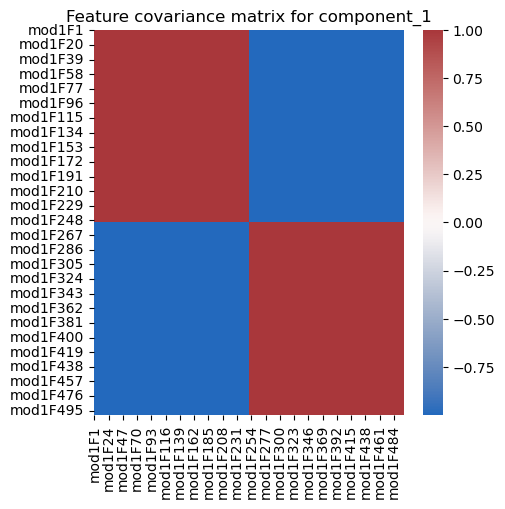

In [11]:
true_order = true_mod1.ids(axis='observation').tolist()
true_cov_table = true_feature_covs[component]
true_cov_table = true_cov_table.loc[true_order, true_order]

plt.figure(figsize=(5, 5))
sns.heatmap(true_cov_table, robust=True, cmap='vlag', center=0)
plt.title('Feature covariance matrix for {}'.format(component))
plt.show()